# Wine Quality Prediction

### Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


### Data collection and preprocessing

In [6]:
 df= pd.read_csv("winequality.csv")

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [160]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
# number of rows and columns
df.shape

(1599, 12)

In [10]:
# show dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Analysis and visualization

In [13]:
# statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


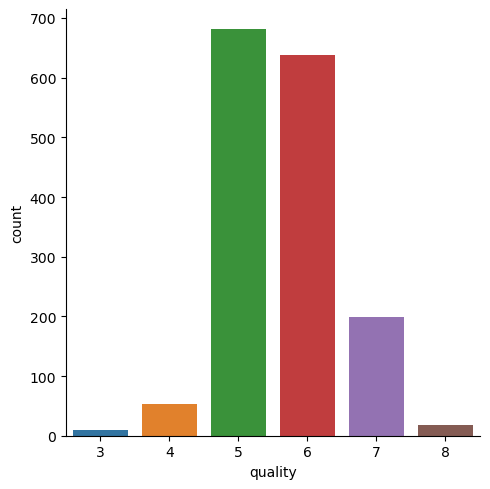

In [18]:
# number of values for each quality
sns.catplot(x = "quality", data =df, kind = "count")

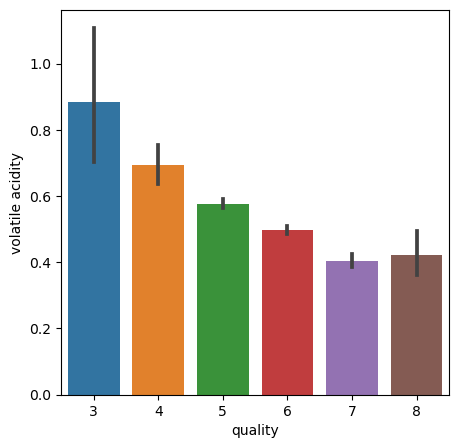

In [19]:
# volatile acidity vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "volatile acidity", data =df)
plt.show()

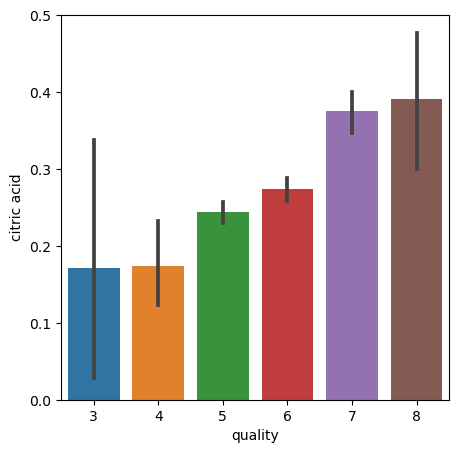

In [26]:
# citric acid vs quality
plot = plt.figure(figsize = (5,5))
sns.barplot(x = "quality", y = "citric acid", data = wine_dataset)
plt.show()

In [21]:
# correlation
correlation = df.corr()

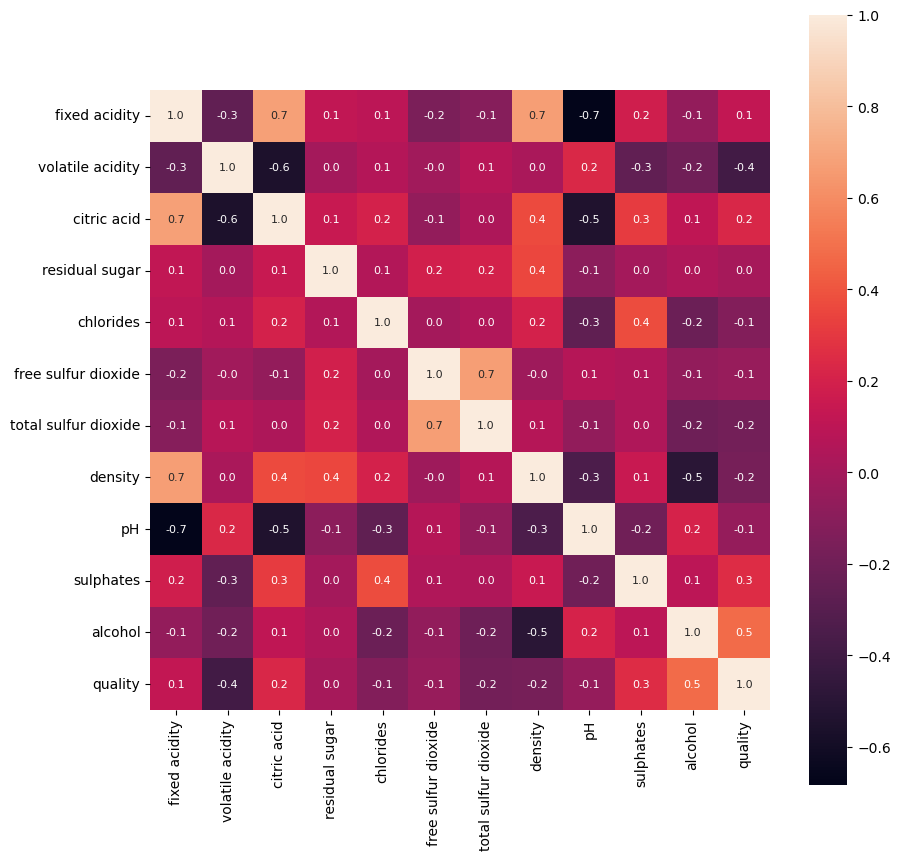

In [23]:
# heatmap for correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {"size": 8})
plt.show()

In [24]:
# separate data and label
x = df.drop("quality", axis = 1)

In [25]:
# label binarization or label encoding
y= df["quality"].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [43]:
print(x)
print(y)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [44]:
y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [52]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy='auto')

# Fit and transform the dataset to create synthetic samples
X,Y = smote.fit_resample(x, y)

In [55]:
Y.value_counts()

0    1382
1    1382
Name: quality, dtype: int64

### Split Train and Test data

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(X, Y, test_size =0.2, stratify = Y, random_state = 1)

In [62]:
print("Total data: ", X.shape)
print("Train data: ",xtrain.shape)
print("Test data: ",xtest.shape)

Total data:  (2764, 11)
Train data:  (2211, 11)
Test data:  (553, 11)


In [66]:
print(xtrain)
print(ytrain)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1970      11.667173          0.304196     0.576369        2.180434   0.086609   
516       12.500000          0.600000     0.490000        4.300000   0.100000   
1345       8.200000          0.440000     0.240000        2.300000   0.063000   
984       12.200000          0.450000     0.490000        1.400000   0.075000   
2511       5.261824          0.460456     0.089003        2.123649   0.047236   
...             ...               ...          ...             ...        ...   
1985       9.248778          0.423762     0.390000        2.097557   0.064888   
683        8.100000          0.780000     0.230000        2.600000   0.059000   
303        7.400000          0.670000     0.120000        1.600000   0.186000   
764        9.100000          0.680000     0.110000        2.800000   0.093000   
425        6.600000          0.840000     0.030000        2.300000   0.059000   

      free sulfur dioxide  

# 1 - Predicting the data using Logistics Regression


In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [72]:
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
print("Accuracy score",acc)
print(cr)

Accuracy score 0.810126582278481
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       276
           1       0.78      0.86      0.82       277

    accuracy                           0.81       553
   macro avg       0.81      0.81      0.81       553
weighted avg       0.81      0.81      0.81       553



# HPT

In [82]:
logreg=LogisticRegression(solver="saga")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [83]:
acc1=accuracy_score(ytest,ypred)
cr1=classification_report(ytest,ypred)
print("Accuracy score",acc1)
print(cr1)

Accuracy score 0.6600361663652803
              precision    recall  f1-score   support

           0       0.72      0.51      0.60       276
           1       0.62      0.81      0.70       277

    accuracy                           0.66       553
   macro avg       0.67      0.66      0.65       553
weighted avg       0.67      0.66      0.65       553



In [85]:
logreg=LogisticRegression(solver="newton-cg")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)


acc2=accuracy_score(ytest,ypred)
cr2=classification_report(ytest,ypred)
print("Accuracy score",acc2)
print(cr2)

Accuracy score 0.8173598553345389
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       276
           1       0.79      0.87      0.83       277

    accuracy                           0.82       553
   macro avg       0.82      0.82      0.82       553
weighted avg       0.82      0.82      0.82       553



#  - Predicting the data using Decision Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [94]:
dt=DecisionTreeClassifier()

In [123]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    print(accuracy_score(ytest,ypred)*100)
    print(classification_report(ytest,ypred))
    return model

In [124]:
mymodel(dt)

89.1500904159132
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       276
           1       0.87      0.92      0.89       277

    accuracy                           0.89       553
   macro avg       0.89      0.89      0.89       553
weighted avg       0.89      0.89      0.89       553



DecisionTreeClassifier()

By using Decision Tree we get average accuracy of 90% which is good but we get moreaccurcy by hyper tunning
ploting decision tree

# Predicting the data using Random Forest

In [125]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
mymodel(rc)


94.75587703435805
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       276
           1       0.91      0.99      0.95       277

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



RandomForestClassifier()

By using Random Forest we get 94% of accuracy.

# Predicting the data using Boosting



## i - Adaboost Classifier

In [126]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
mymodel(ada)

86.07594936708861
              precision    recall  f1-score   support

           0       0.90      0.81      0.85       276
           1       0.83      0.91      0.87       277

    accuracy                           0.86       553
   macro avg       0.86      0.86      0.86       553
weighted avg       0.86      0.86      0.86       553



AdaBoostClassifier()

By using AdaBoost Classifier we get 86% of accuracy

## ii - Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
mymodel(gbc)

92.40506329113924
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       276
           1       0.89      0.97      0.93       277

    accuracy                           0.92       553
   macro avg       0.93      0.92      0.92       553
weighted avg       0.93      0.92      0.92       553



GradientBoostingClassifier()

By using Gradient Boosting algorithm we get 92% of accuracy

## - XG Boosting

In [133]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
mymodel(xgb)

94.9367088607595
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       276
           1       0.92      0.98      0.95       277

    accuracy                           0.95       553
   macro avg       0.95      0.95      0.95       553
weighted avg       0.95      0.95      0.95       553



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

By using XG Boost algorithm we get 95% of accuracy

### Predicting the data using Encemble Learning

### i - Bagging

In [138]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(LogisticRegression())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.85      0.76      0.80       276
           1       0.78      0.87      0.82       277

    accuracy                           0.81       553
   macro avg       0.82      0.81      0.81       553
weighted avg       0.82      0.81      0.81       553



BY Using this  bagging we got 81% accuracy.

In [145]:
bg=BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       276
           1       0.90      0.97      0.93       277

    accuracy                           0.93       553
   macro avg       0.93      0.93      0.93       553
weighted avg       0.93      0.93      0.93       553



By using Bagging Classifier on Decision Tree we get 93% of accuracy.``

In [146]:
models=[]
models.append(("lr",LogisticRegression()))
models.append(("dt",DecisionTreeClassifier()))

In [150]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=models)
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       276
           1       0.90      0.82      0.86       277

    accuracy                           0.86       553
   macro avg       0.87      0.86      0.86       553
weighted avg       0.87      0.86      0.86       553



In [151]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=models,voting='soft')
vc.fit(xtrain,ytrain)
ypred=vc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       276
           1       0.89      0.93      0.91       277

    accuracy                           0.90       553
   macro avg       0.91      0.90      0.90       553
weighted avg       0.91      0.90      0.90       553



# Conclusion

#### Based on the above accuracy scores, best accuracy we got from xgboost and random forest that is 95 and 94.

# Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [154]:
lr=LinearRegression()

In [159]:
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
mse=mean_squared_error(ytest,ypred)
print(mse)
acc=r2_score(ytest,ypred)
print("accuracy score=",acc)

0.13267286031316278
accuracy score= 0.46930682337273066
